This notebook implements the raw solution of linear regression.

In [50]:
import sys

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [51]:
root_path = Path.cwd().parent.parent.parent.parent / "src"

In [52]:
sys.path.append(root_path.absolute().as_posix())
sns.set_style("whitegrid")

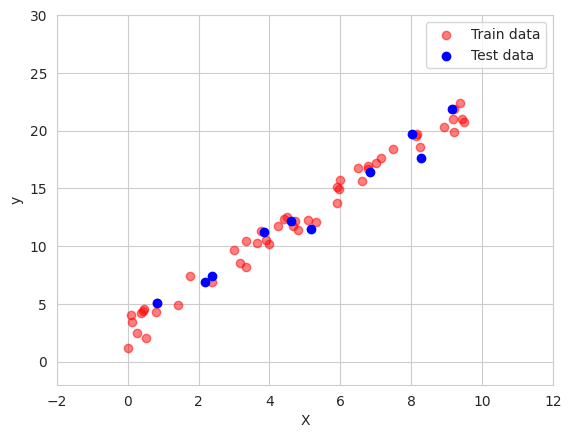

In [53]:
X_train = 10 * np.random.rand(50)
y_train = 2*X_train + 1 + (3*np.random.rand(X_train.shape[0]))

X_test = 10*np.random.rand(10)
y_test = 2*X_test + 1 + (3*np.random.rand(X_test.shape[0]))

fig, ax = plt.subplots()

ax.scatter(X_train, y_train, color="red",alpha=0.5, label="Train data")
ax.scatter(X_test, y_test, color="blue", label="Test data")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_xlim(-2, 12)
ax.set_ylim(-2, 30)
ax.legend()

plt.show()

we have some data as red points and our goal is to predict the y-coordinate of the blue points?

In [54]:
from MachineLearning.losses import RootMeanSquaredError
from MachineLearning.optimizers import GradientDecent
from MachineLearning.commons import Model_LinearRegression_Loss_Mean_Squared_Error

epoch 0, loss: 18.13070819377272
epoch 1, loss: 3.8066010865221487
epoch 2, loss: 1.957607063312599
epoch 3, loss: 1.7101472558798931
epoch 4, loss: 1.66838763715776
epoch 5, loss: 1.653144839366397
epoch 6, loss: 1.6414159961565309
epoch 7, loss: 1.6302470230024633
epoch 8, loss: 1.619257495353983
epoch 9, loss: 1.6083973808478955
epoch 10, loss: 1.5976590726376414
epoch 11, loss: 1.5870404231900688
epoch 12, loss: 1.576539998816271
epoch 13, loss: 1.5661564703543056
epoch 14, loss: 1.5558885348081122
epoch 15, loss: 1.5457349051464522
epoch 16, loss: 1.535694308853066
epoch 17, loss: 1.5257654876017892
epoch 18, loss: 1.5159471970776257
epoch 19, loss: 1.5062382068180773
epoch 20, loss: 1.4966373000585864
epoch 21, loss: 1.4871432735800045
epoch 22, loss: 1.4777549375577954
epoch 23, loss: 1.4684711154129169
epoch 24, loss: 1.4592906436643702
epoch 25, loss: 1.450212371783394
epoch 26, loss: 1.4412351620492654
epoch 27, loss: 1.4323578894067273
epoch 28, loss: 1.423579441324984
epoch

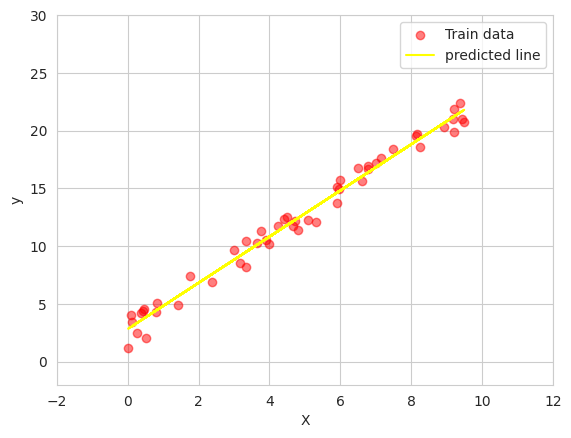

In [55]:
model = Model_LinearRegression_Loss_Mean_Squared_Error()
optimizer = GradientDecent(model=model.model, lr=0.01)

epochs = 10_000
for epoch in range(epochs):
    model.forward(X_train, y_train)
    
    print(f"epoch {epoch}, loss: {model.loss_function.output}")
    
    model.backprop()
    optimizer.update_params()

# Plot to how well it did.
fig, ax = plt.subplots()

ax.scatter(X_train, y_train, color="red",alpha=0.5, label="Train data")
ax.plot(X_train, model.output, color="yellow", label="predicted line")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_xlim(-2, 12)
ax.set_ylim(-2, 30)
ax.legend()

plt.show()

In [56]:
# Evaluation on test data
root_mean_squared_error = RootMeanSquaredError()

model.forward(X_test, y_test)
predictions = model.output

root_mean_squared_error.calculate(y_test, predictions)
root_mean_squared_error.output

0.8925072739295776